Number of duplicate records dropped:  1209
Number of incorrect values 59
      FECHA DE OBS. DIRS[°] DIRR[°] VELS[km/h] VELR[km/h] TEMP[°C] HR[%]  \
1  18/10/2019 10:20      70      72        9.7       18.4     19.8    37   
2  18/10/2019 10:10      64      53        9.1       14.8     19.6    36   
3  18/10/2019 10:00      55      76        7.7       18.7     18.8    38   
4  18/10/2019 09:50      54      53        7.6       16.9       18    40   
5  18/10/2019 09:40      61      72        9.6       19.8     17.9    40   

  PB[mBar] PREC[mm] RAD[kWh/m² TEMPC[°C] HUMCO[%] HUMSU[%] TEMPS[°C]  
1    803.4        0        365      17.8       72       24      16.8  
2    803.3        0        303      15.8       66       24      16.8  
3    803.2        0        324      15.2       67       25      16.8  
4    803.1        0        276      14.7       67       24      16.9  
5      803        0        172      14.3       67       21      16.9  
-----------------------------Group by Date b

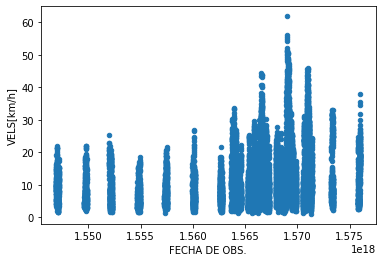

In [143]:
#Mainreport_EMA_Raw Data : Sierra_luna 
#from https://pic.conabio.gob.mx/homepage/pic/emas.html; Climate Information plataform
import pandas as pd 
import datetime
import matplotlib.pyplot as plt

raw_data=pd.read_csv('Mainreport_EMA_raw_data_export.csv')
before=len(raw_data)
raw_data=raw_data.drop_duplicates()
after=len(raw_data)
print('Number of duplicate records dropped: ', str(before - after))
data=raw_data.drop(raw_data.index[0])
data = data.rename(columns={'DIRS':'DIRS[°]','DIRR':'DIRR[°]','VELS':'VELS[km/h]','VELR':'VELR[km/h]',
                            'TEMP':'TEMP[°C]','HR':'HR[%]','PB':'PB[mBar]','PREC':'PREC[mm]','RAD-':'RAD[kWh/m²',
                            'TEMPC':'TEMPC[°C]','HUMCO':'HUMCO[%]','HUMSU':'HUMSU[%]','TEMPS':'TEMPS[°C]'})
null_cols = data.isnull().sum()
null_cols[null_cols > 0]
data = data[(data[['DIRS[°]','DIRR[°]','VELS[km/h]','VELR[km/h]',
                   'TEMP[°C]','HR[%]','PB[mBar]','PREC[mm]','RAD[kWh/m²',
                  'TEMPC[°C]','HUMCO[%]','HUMSU[%]','TEMPS[°C]']] != "").all(axis=1)]

data = data.dropna(subset=['DIRS[°]','DIRR[°]','VELS[km/h]','VELR[km/h]',
                    'TEMP[°C]','HR[%]','PB[mBar]','PREC[mm]','RAD[kWh/m²',
                  'TEMPC[°C]','HUMCO[%]','HUMSU[%]','TEMPS[°C]'])
double_after=len(data)
print('Number of incorrect values', str(after - double_after))
null_cols = data.isnull().sum()
null_cols[null_cols > 0]
data.to_csv('Data_clean_EMA', index=False)
print(data.head())

print('-----------------------------Group by Date by average-----------------------------------------\n')


data['DIRS[°]'] = pd.to_numeric(data['DIRS[°]'],errors='coerce')
data['DIRR[°]'] = pd.to_numeric(data['DIRR[°]'],errors='coerce')
data['VELS[km/h]'] = pd.to_numeric(data['VELS[km/h]'],errors='coerce')
data['TEMP[°C]'] = pd.to_numeric(data['TEMP[°C]'],errors='coerce')
data['HR[%]'] = pd.to_numeric(data['HR[%]'],errors='coerce')
data['PB[mBar]'] = pd.to_numeric(data['PB[mBar]'],errors='coerce')
data['PREC[mm]'] = pd.to_numeric(data['PREC[mm]'],errors='coerce')
data['RAD[kWh/m²'] = pd.to_numeric(data['RAD[kWh/m²'],errors='coerce')
data['HUMCO[%]'] = pd.to_numeric(data['HUMCO[%]'],errors='coerce')

data['FECHA DE OBS.'] = pd.to_datetime(data['FECHA DE OBS.'],errors='coerce')
data_por_dia = data.groupby(data['FECHA DE OBS.'].dt.day).mean()
data_por_dia=data_por_dia.rename(columns={'FECHA DE OBS.':'PROMEDIO DEL DIA'})
print(data_por_dia.head())
data_por_dia.to_csv('Data_clean_EMA_pordia', index=False)          


print(data_por_dia.describe().transpose())
data['FECHA DE OBS.'] = pd.to_numeric(data['FECHA DE OBS.'],errors='coerce')
my_plot = data.plot('FECHA DE OBS.','VELS[km/h]',kind="scatter")